# Import libraries

In [65]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, classification_report

In [66]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resume_screening/UpdatedResumeDataSet.csv')

In [67]:
print(data.shape)
print(data.info())

(962, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [68]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [69]:
print(data['Resume'][10])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

# Data Exploration

In [70]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)



Category    0
Resume      0
dtype: int64


In [71]:
# Explore the distribution of categories
category_counts = data['Category'].value_counts()
print(category_counts)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


# Text Data Analysis

In [72]:
cv = CountVectorizer(max_features=20)  # You can adjust the number of features
word_frequency = cv.fit_transform(data['Resume'])

# Get the most common words
common_words = cv.get_feature_names_out()
print(common_words)


['and' 'as' 'company' 'data' 'description' 'details' 'exprience' 'for'
 'in' 'is' 'maharashtra' 'management' 'months' 'of' 'on' 'project' 'team'
 'the' 'to' 'with']


In [73]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Example: Text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply the cleaning function to the 'Resume' column
data['Cleaned_Resume'] = data['Resume'].apply(clean_text)


In [75]:
print(data['Cleaned_Resume'][10])


skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run anal

## Data Visualization
### Category Distribution
Visualize the distribution of resume categories

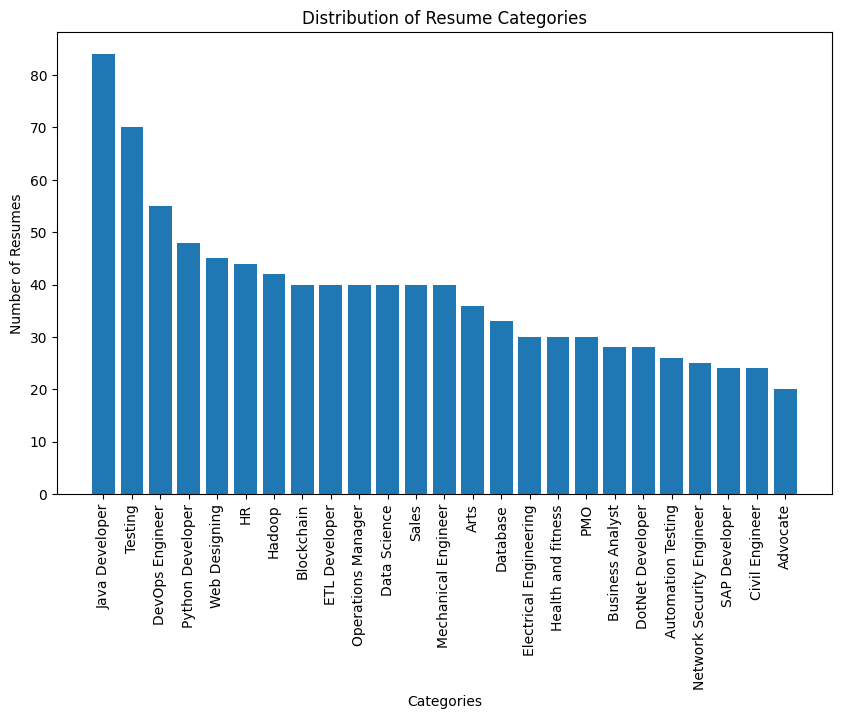

In [76]:
# Count the number of resumes in each category
category_counts = data['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Number of Resumes')
plt.title('Distribution of Resume Categories')
plt.xticks(rotation=90)
plt.show()


## Word Cloud
 word cloud to visualize the most common words in the resumes

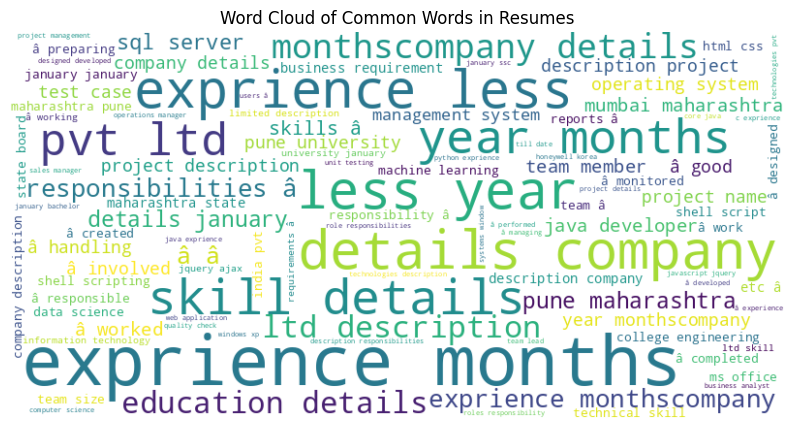

In [77]:
# Combine all cleaned resumes into a single text
combined_text = " ".join(data['Cleaned_Resume'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Resumes')
plt.show()


##  Category-specific Word Clouds
word clouds for each category to see which words are more prominent in different job categories

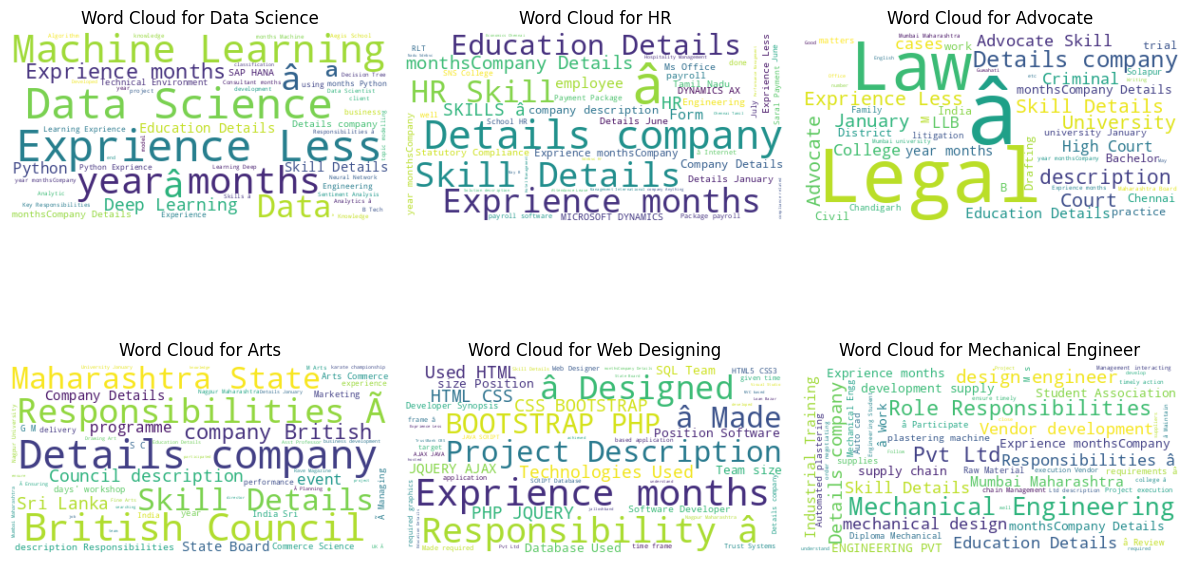

In [78]:
# Create word clouds for a subset of categories
categories = data['Category'].unique()
plt.figure(figsize=(12, 8))

# Choose a subset of categories to visualize
categories_to_visualize = categories[:6]  # Visualize the first 6 categories

for i, category in enumerate(categories_to_visualize):
    plt.subplot(2, 3, i+1)
    category_text = " ".join(data[data['Category'] == category]['Resume'])
    wordcloud = WordCloud(width=400, height=200, max_words=50, background_color='white').generate(category_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Label Encoding
Encode the category labels into numerical values

In [79]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
data['Category_Encoded'] = label_encoder.fit_transform(data['Category'])


In [80]:
# Initialisation de LabelEncoder
label_encoder = LabelEncoder()

# Encodage de la colonne 'Category'
data['Category_Encoded'] = label_encoder.fit_transform(data['Category'])

# Récupération de la liste des catégories et de leurs codes encodés
categories = label_encoder.classes_

# Affichage des catégories et de leurs codes encodés
for code, category in enumerate(categories):
    print(f"Code encodé : {code}, Catégorie : {category}")


Code encodé : 0, Catégorie : Advocate
Code encodé : 1, Catégorie : Arts
Code encodé : 2, Catégorie : Automation Testing
Code encodé : 3, Catégorie : Blockchain
Code encodé : 4, Catégorie : Business Analyst
Code encodé : 5, Catégorie : Civil Engineer
Code encodé : 6, Catégorie : Data Science
Code encodé : 7, Catégorie : Database
Code encodé : 8, Catégorie : DevOps Engineer
Code encodé : 9, Catégorie : DotNet Developer
Code encodé : 10, Catégorie : ETL Developer
Code encodé : 11, Catégorie : Electrical Engineering
Code encodé : 12, Catégorie : HR
Code encodé : 13, Catégorie : Hadoop
Code encodé : 14, Catégorie : Health and fitness
Code encodé : 15, Catégorie : Java Developer
Code encodé : 16, Catégorie : Mechanical Engineer
Code encodé : 17, Catégorie : Network Security Engineer
Code encodé : 18, Catégorie : Operations Manager
Code encodé : 19, Catégorie : PMO
Code encodé : 20, Catégorie : Python Developer
Code encodé : 21, Catégorie : SAP Developer
Code encodé : 22, Catégorie : Sales
Co

In [81]:
data

,Category,Resume,Cleaned_Resume,Category_Encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 uitrgpv da...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â r â python â sap hana â tableau â sap...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills â proficient ms office word ba...,23
958,Testing,â Willingness to accept the challenges. â ...,â willingness accept challenges â positive thi...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills â quick learner â eagerness le...,23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge mspower poi...,23


# Data Splitting
Split the data into training and testing sets for model training and evaluation

In [82]:
# Split the data into features (X) and target (y)
X = data['Cleaned_Resume']
y = data['Category_Encoded']

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Text Vectorization
Vectorize the text data (X_train and X_test) to prepare it for model training. We will use the TF-IDF vectorizer

In [83]:

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform the text data for training
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Model Training
Train our machine learning models on the vectorized data

In [84]:

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
}

# Create dictionaries to store model metrics
accuracy_scores = {}
classification_reports = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions on testing data
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=data['Category'].unique(), output_dict=True)
    classification_reports[model_name] = report


In [85]:
# Display accuracy scores and classification reports
for model_name, accuracy in accuracy_scores.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_reports[model_name])
    print("\n")



Model: Random Forest
Accuracy: 0.9896
Classification Report:
{'Data Science': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'HR': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'Advocate': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Arts': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7}, 'Web Designing': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Mechanical Engineer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'Sales': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Health and fitness': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'Civil Engineer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14}, 'Java Developer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'Business Analyst': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7}, 'SAP Developer': {'precisio

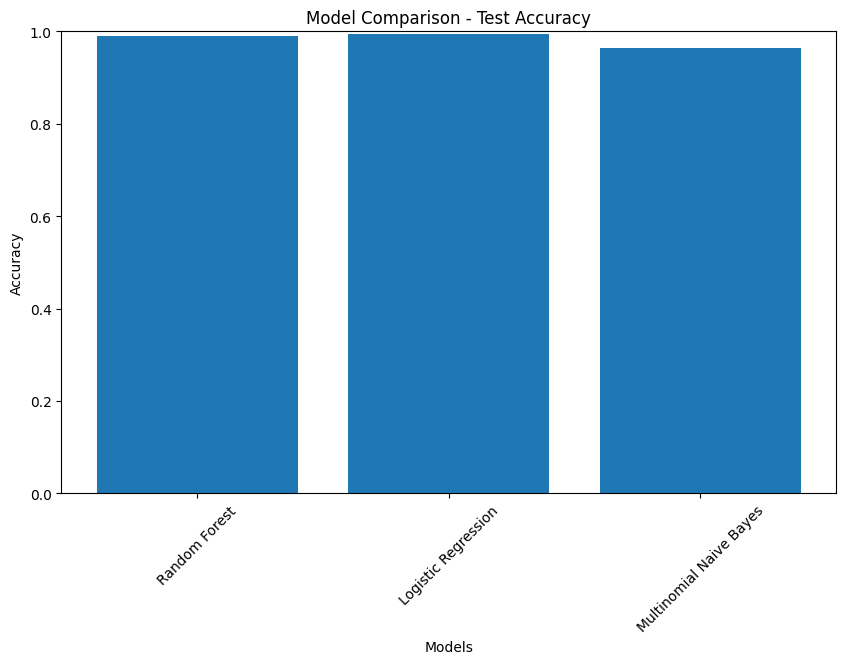

In [86]:
# Create a bar plot to compare model accuracy
model_names = accuracy_scores.keys()
accuracies = accuracy_scores.values()

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.show()


Based on the accuracy and classification reports for each model, here are the results:

## Random Forest:

## Accuracy: 0.9896
Classification Report:
The model achieved high accuracy, but there are variations in precision, recall, and F1-score across different categories. Some categories have perfect scores, while others have lower scores, particularly in the 'Data Science' category.
## Logistic Regression:

## Accuracy: 0.9948
Classification Report:
The model achieved very high accuracy and generally performed well across different categories. It has high precision, recall, and F1-scores for most categories.
## Multinomial Naive Bayes:

## Accuracy: 0.9637
Classification Report:
The model achieved good accuracy but has some variations in precision, recall, and F1-score across different categories. It performs well in some categories but less so in others.


Best Model Selection:
Based on the provided metrics
##  Logistic Regression
appears to be the best-performing model for this classification task. It achieved the highest accuracy and generally high precision, recall, and F1-scores across different categories

In [87]:
# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [88]:
import pickle
# Sauvegarde du modèle
with open("/content/drive/MyDrive/Colab Notebooks/resume_screening/resume_classification.pkl", "wb") as model_file:
    pickle.dump(logistic_regression_model, model_file)